## Visualizing statistical relationships
### [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

### Relating variables with scatter plots
The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

#### Draw a scatter plot
- scatterplot(): both variables are numeric.
- special tools for categorical data: [Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)

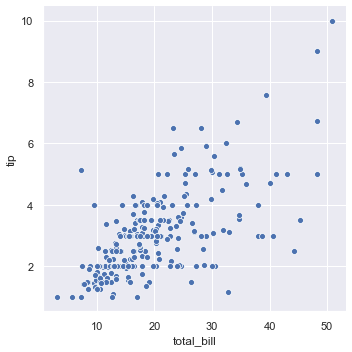

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

#### hue attr.
While the points are plotted in two dimensions, another dimension can be added to the plot by **coloring** the points according to a **third** variable. 

In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

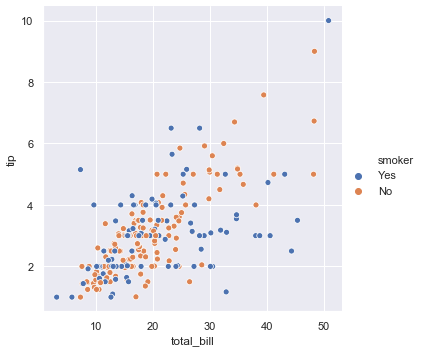

In [3]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

To emphasize the difference between the classes, and to improve accessibility, you can use **a different marker style** for each class:

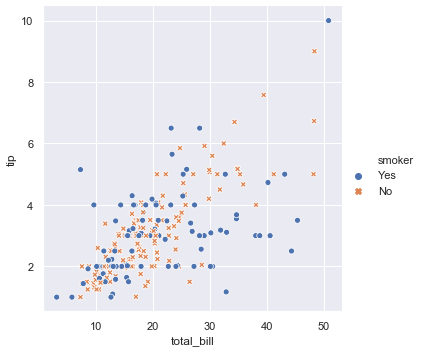

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

It's also possible to represent **four** variables by changing the hue and style of each point independently. But this should be done carefully, because **the eye is much less sensitive to shape than to color**:

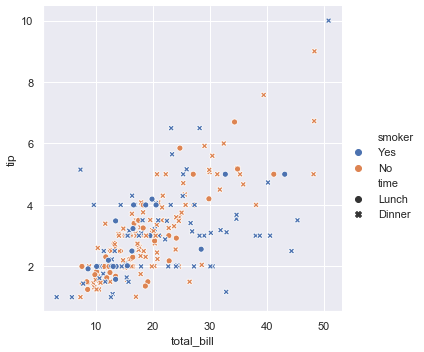

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

In the examples above, the hue semantic was **categorical**, so the default qualitative palette was applied.

If the hue semantic is **numeric** (specifically, if it can be cast to float), the default coloring switches to a **sequential palette**:

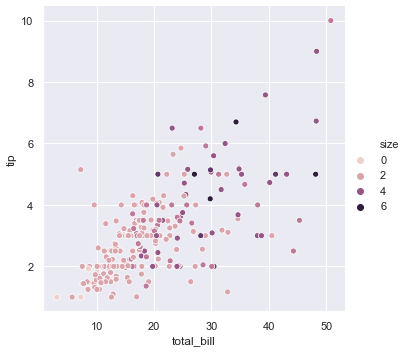

In [7]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

#### size attr.
The third kind of semantic variable changes the size of each point:

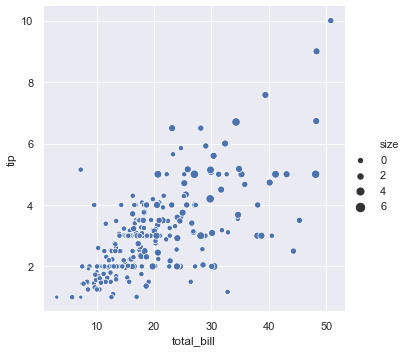

In [8]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

### Emphasizing continuity with line plots
Scatter plots are highly effective, but there is no universally optimal type of visualiation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

### Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean.

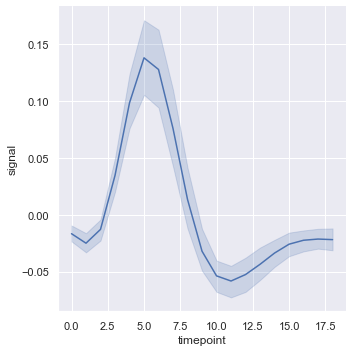

In [9]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

Setting ci attr.:
- ci = None: disable the confidence intervals.
- ci = "sd": plotting the standard deviation instead of ci.

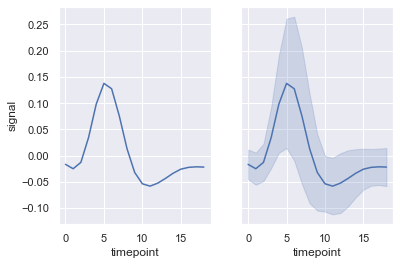

In [19]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.lineplot(x="timepoint", y="signal", ci=None, data=fmri, ax=axes[0])
sns.lineplot(x="timepoint", y="signal", ci="sd", data=fmri, ax=axes[1]);

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

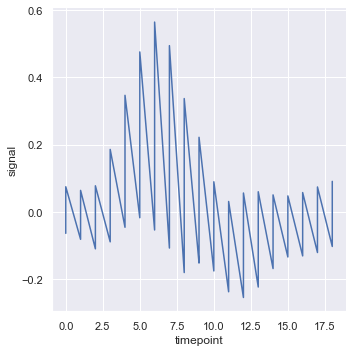

In [21]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

### Plotting subsets of data with semantic mappings
The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements. It does so using the same API as scatterplot(), meaning that we don’t need to stop and think about the parameters that control the look of lines vs. points in matplotlib.

Using semantics in lineplot() will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

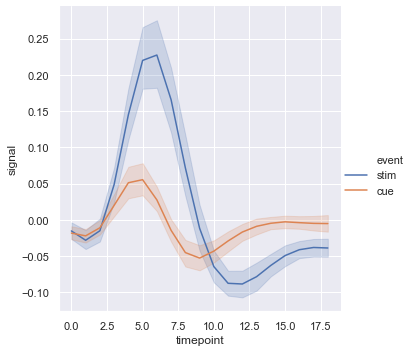

In [25]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

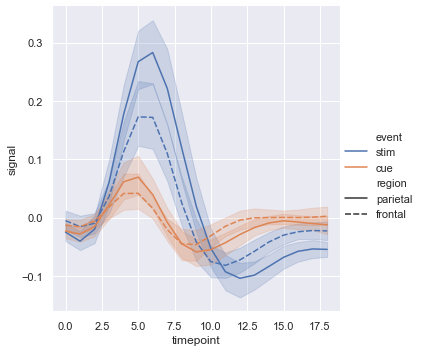

In [26]:
sns.relplot(x="timepoint", y="signal", hue="event", style="region", kind="line", data=fmri);

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

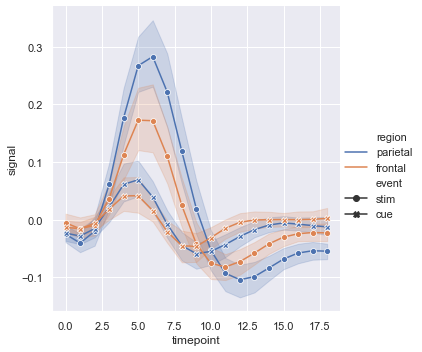

In [35]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

### Plotting with date data

Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:

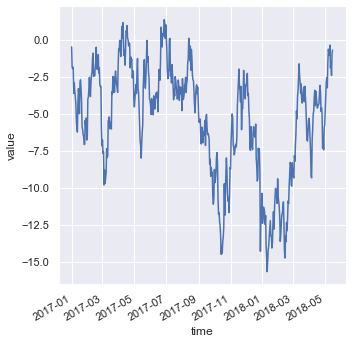

In [38]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Showing multiple relationships with facets
We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

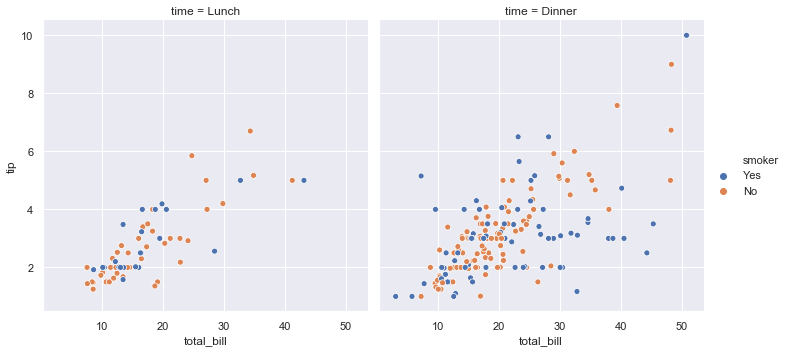

In [40]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

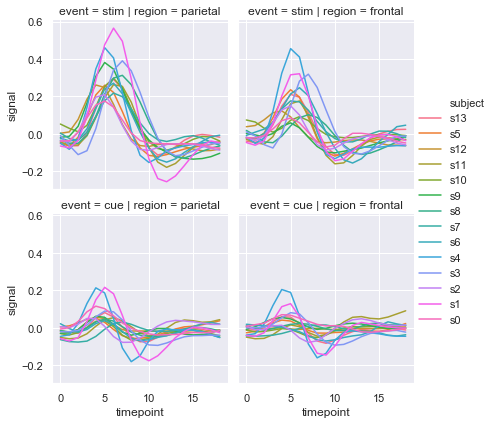

In [41]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

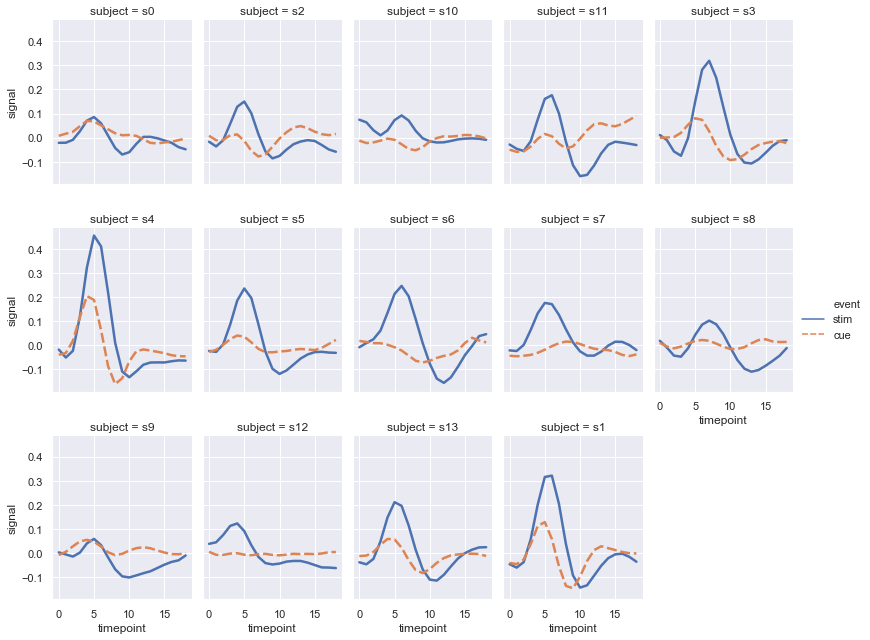

In [42]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

## Next - Plotting with categorical data